# Autoencoder

An autoencoder is a neural network that takes an input, encodes it into a lower-dimensional latent space through "encoding" layers, and then attempts to reconstruct the original input using "decoding" layers. Autoencoders are often used for dimensionality reduction.

### Your task

You will train a 64x16x64 autoencoder on the [digits](https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset) dataset. All of the following work should be done in a Jupyter Notebook.

### To-do

* Load the digits dataset through sklearn using <code><a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html">sklearn.datasets.load_digits()</a></code>.
* Split the data into training and validation sets.
* Generate an instance of your `NeuralNetwork` class with a 64x16x64 autoencoder architecture.
* Train your autoencoder on the training data.
* Plot your training and validation loss by epoch.
* Quantify your average reconstruction error over the validation set.
* Explain why you chose the hyperparameter values you did.

In [19]:
# Imports
from nn.nn import NeuralNetwork
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

## Get data

In [20]:
training_data = datasets.load_digits()
X = training_data.data

# Randomly sample from the data for training and validation, 80% training, 20% validation
np.random.seed(0)
indices = np.random.permutation(len(X))
X_train = X[indices[: -len(X) // 5]]
X_val = X[indices[-len(X) // 5 :]]

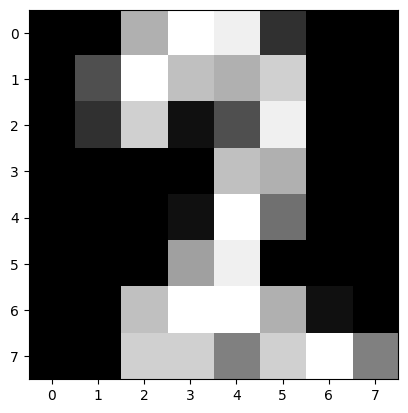

[[ 0.  0. 11. 16. 15.  3.  0.  0.]
 [ 0.  5. 16. 12. 11. 13.  0.  0.]
 [ 0.  3. 13.  1.  5. 15.  0.  0.]
 [ 0.  0.  0.  0. 12. 11.  0.  0.]
 [ 0.  0.  0.  1. 16.  7.  0.  0.]
 [ 0.  0.  0. 10. 15.  0.  0.  0.]
 [ 0.  0. 12. 16. 16. 11.  1.  0.]
 [ 0.  0. 13. 13.  8. 13. 16.  8.]]


In [21]:
plt.imshow(X_train[0].reshape(8, 8), cmap="gray")
plt.show()
print(X_train[0].reshape(8, 8))

## Build network

In [22]:
nn = NeuralNetwork(
    nn_arch=[
        {"input_dim": 64, "output_dim": 16, "activation": "relu"},
        {"input_dim": 16, "output_dim": 64, "activation": "relu"},
    ],
    lr=0.0001,
    seed=0,
    batch_size=6,
    epochs=100,
    loss_function="mse",
)

print(X_train.shape)
print(X_val.shape)
per_epoch_loss_train, per_epoch_loss_val = nn.fit(X_train, X_train, X_val, X_val)

(1437, 64)
(360, 64)


## Plot loss

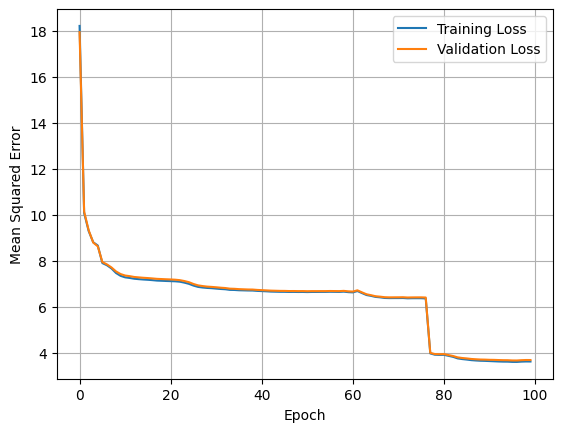

In [23]:
plt.plot(per_epoch_loss_train, label="Training Loss")
plt.plot(per_epoch_loss_val, label="Validation Loss")
plt.legend()
plt.grid()
plt.ylabel("Mean Squared Error")
plt.xlabel("Epoch")
plt.show()

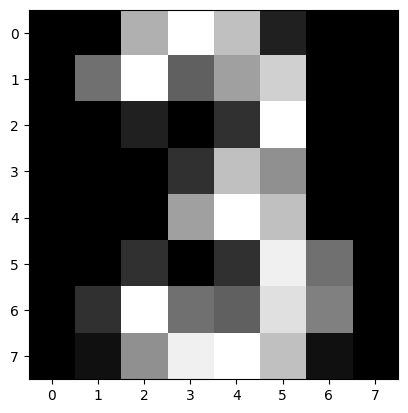

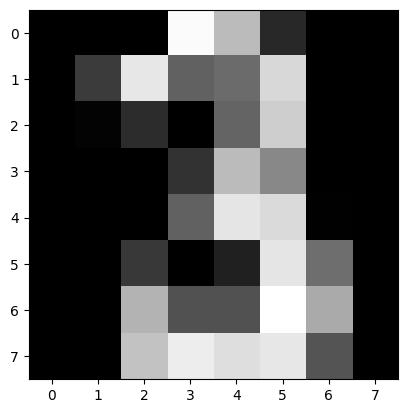

In [26]:
plt.imshow(X_val[10].reshape(8, 8), cmap="gray")
plt.show()
output = nn.predict(X_val[10])
plt.imshow(output.reshape(8, 8), cmap="gray")
plt.show()

## Quantify error

In [25]:
validation_prediction = nn.predict(X_val)
print("Average Validation Error: ", nn._mean_squared_error(X_val, validation_prediction))

Average Validation Error:  3.691860098364222


## Explanation of hyperparameters

The validation error is quite good given that it is pooled across all grayscale values ranging from 0 (black) to 16 (white). As can be seen in the plotted predictions above, the autoencoder is doing a good job of reconstructing the input data. I chose the learning rate and batch size values because by seeing which values reduced the training loss the most. I chose the number of epochs based on the point at which the training loss seemed to converge to a minimum value. Mean squared error loss is best for this data, which ranges from 0 to 16 instead of binary values.

Another approach to the loss could be to normalize the input data between 0 and 1 and use BCE loss. However, the MSE loss seems to perform well enough.